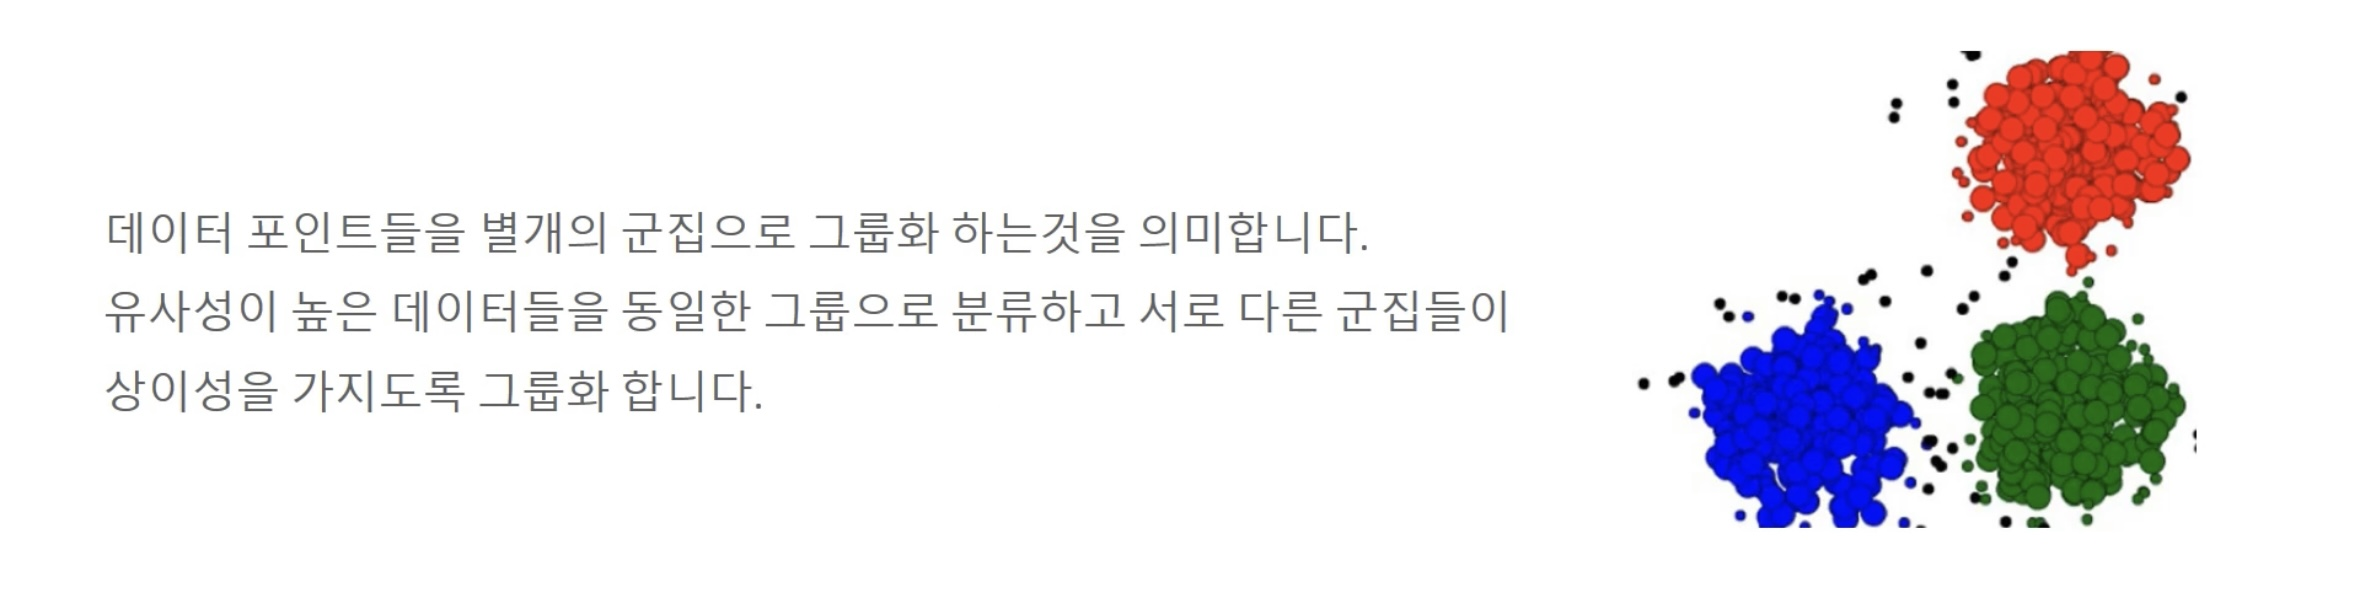

## 군집화 활용 분야 
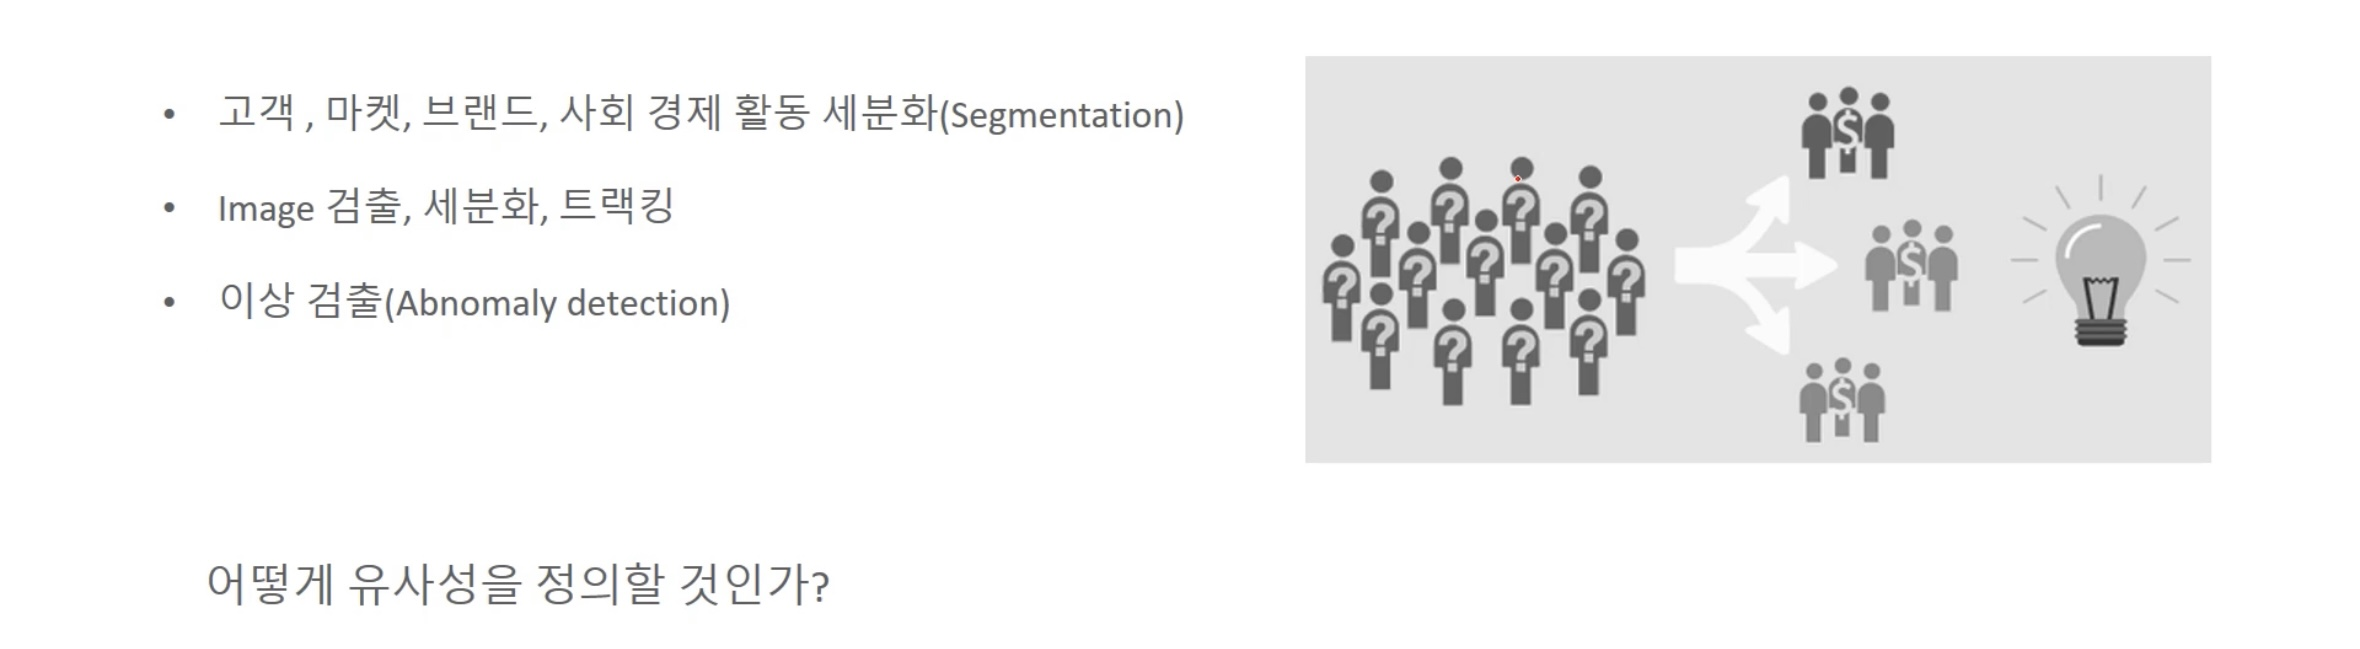

## 군집화 알고리즘 
* K-Means 
* Mean Shift 
* Gaussian Mixture Model 
* DBSCAN

# K-Means Clustering

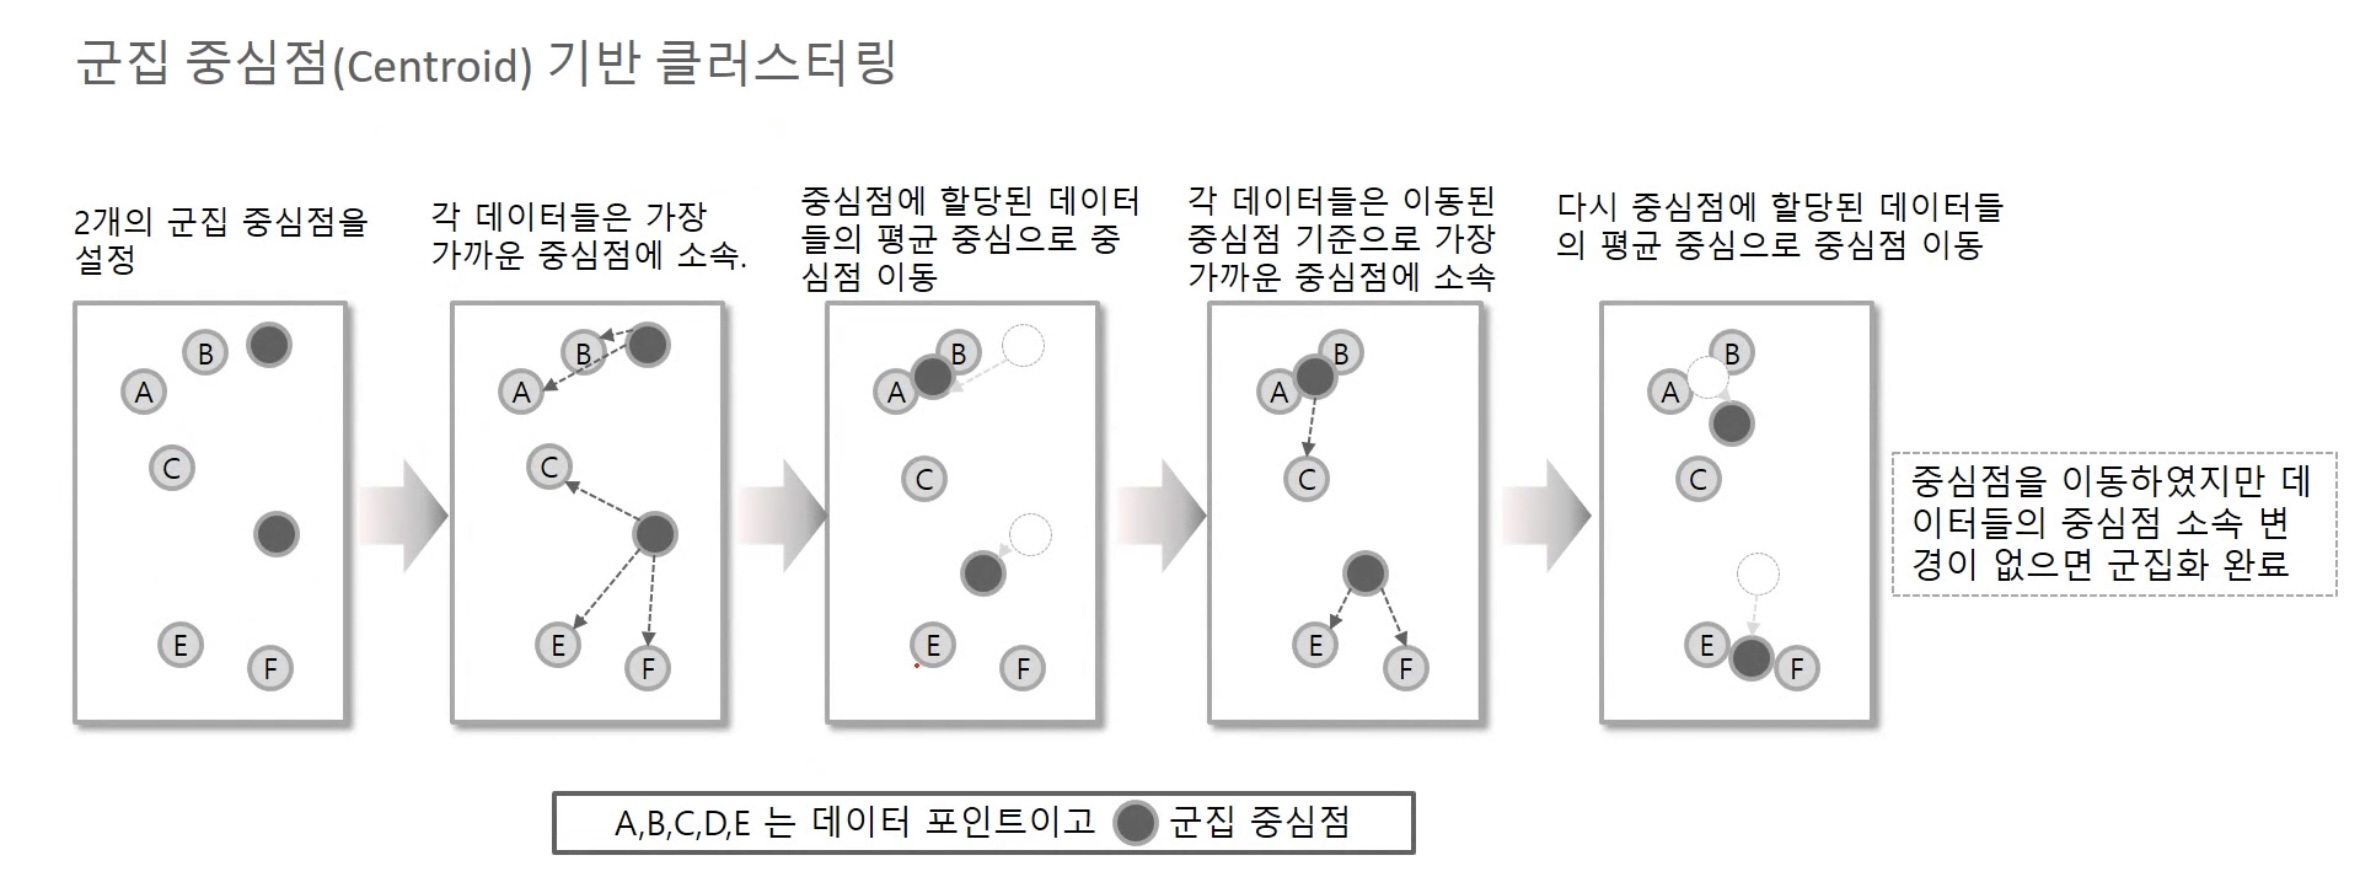

## K-Means의 장점과 단점 

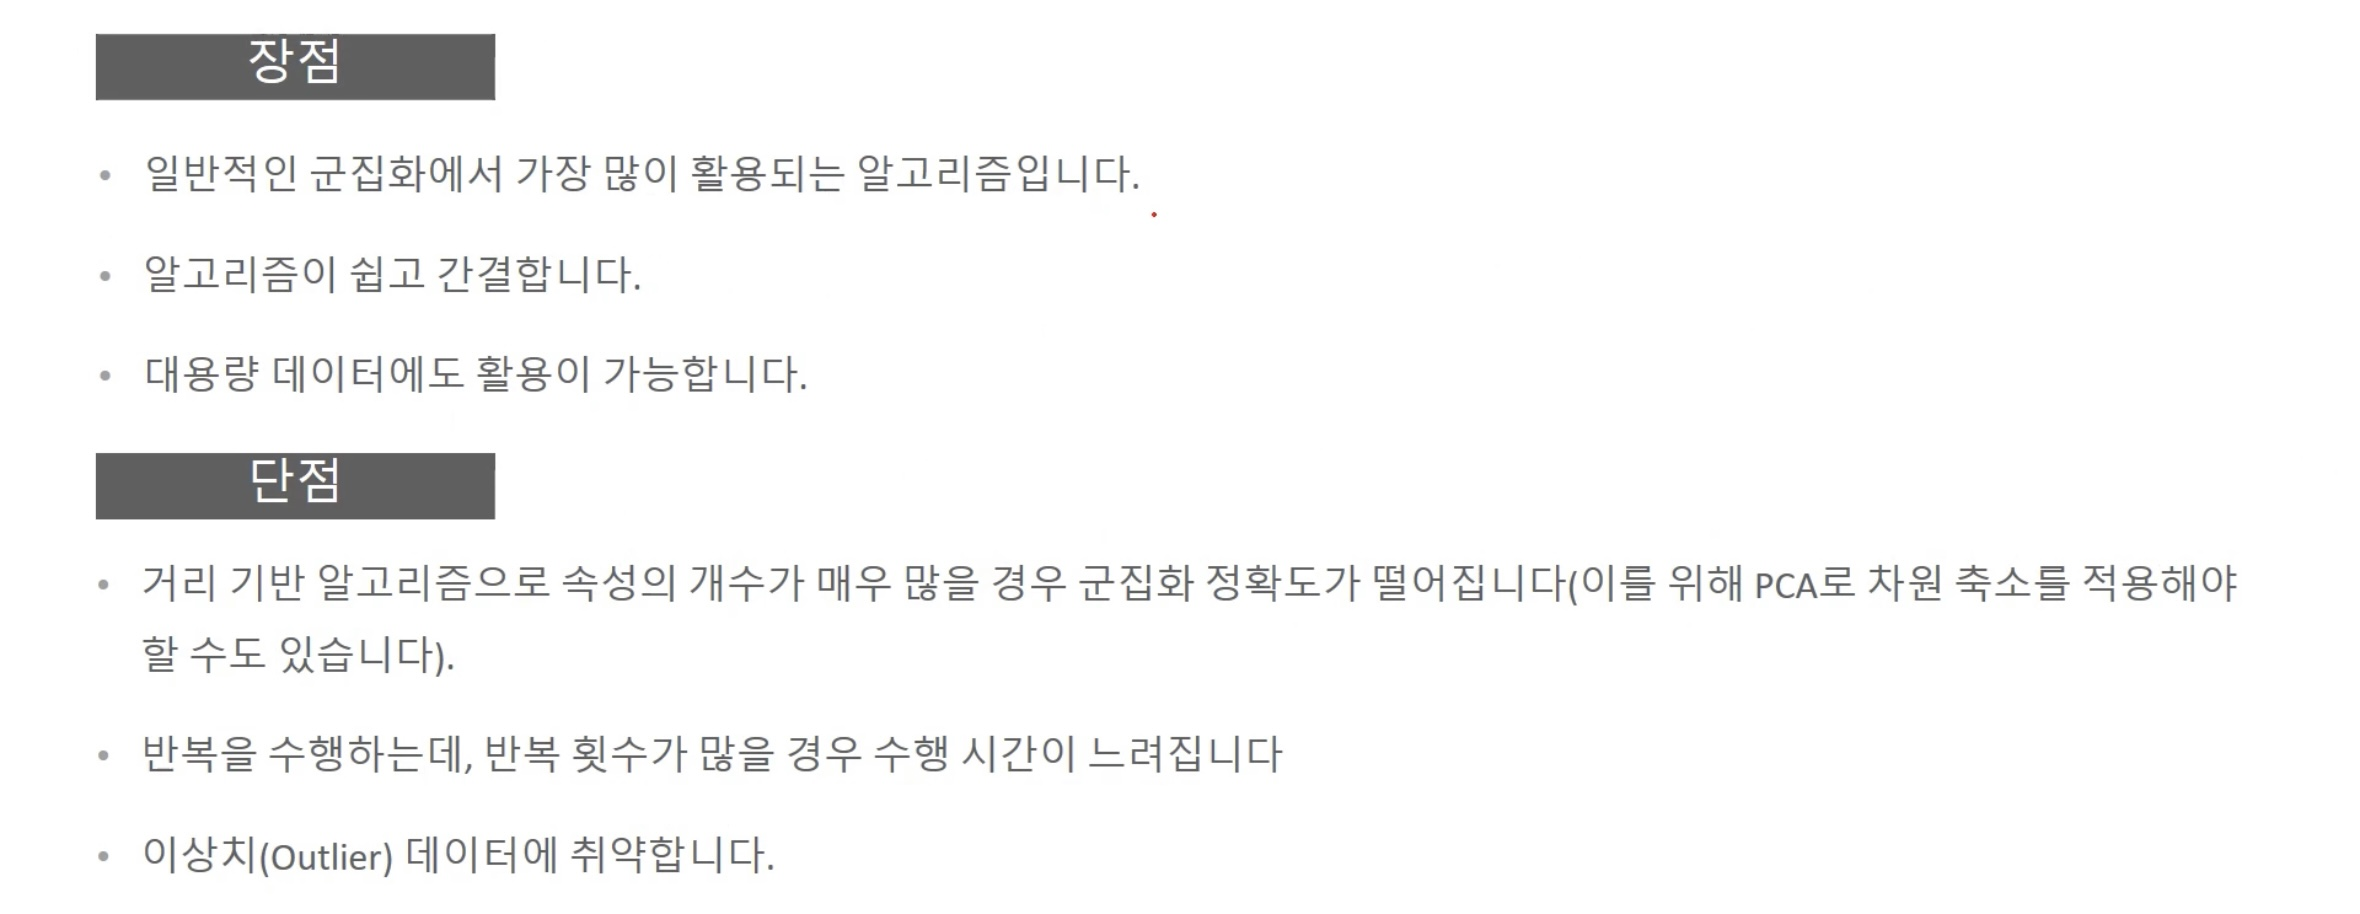

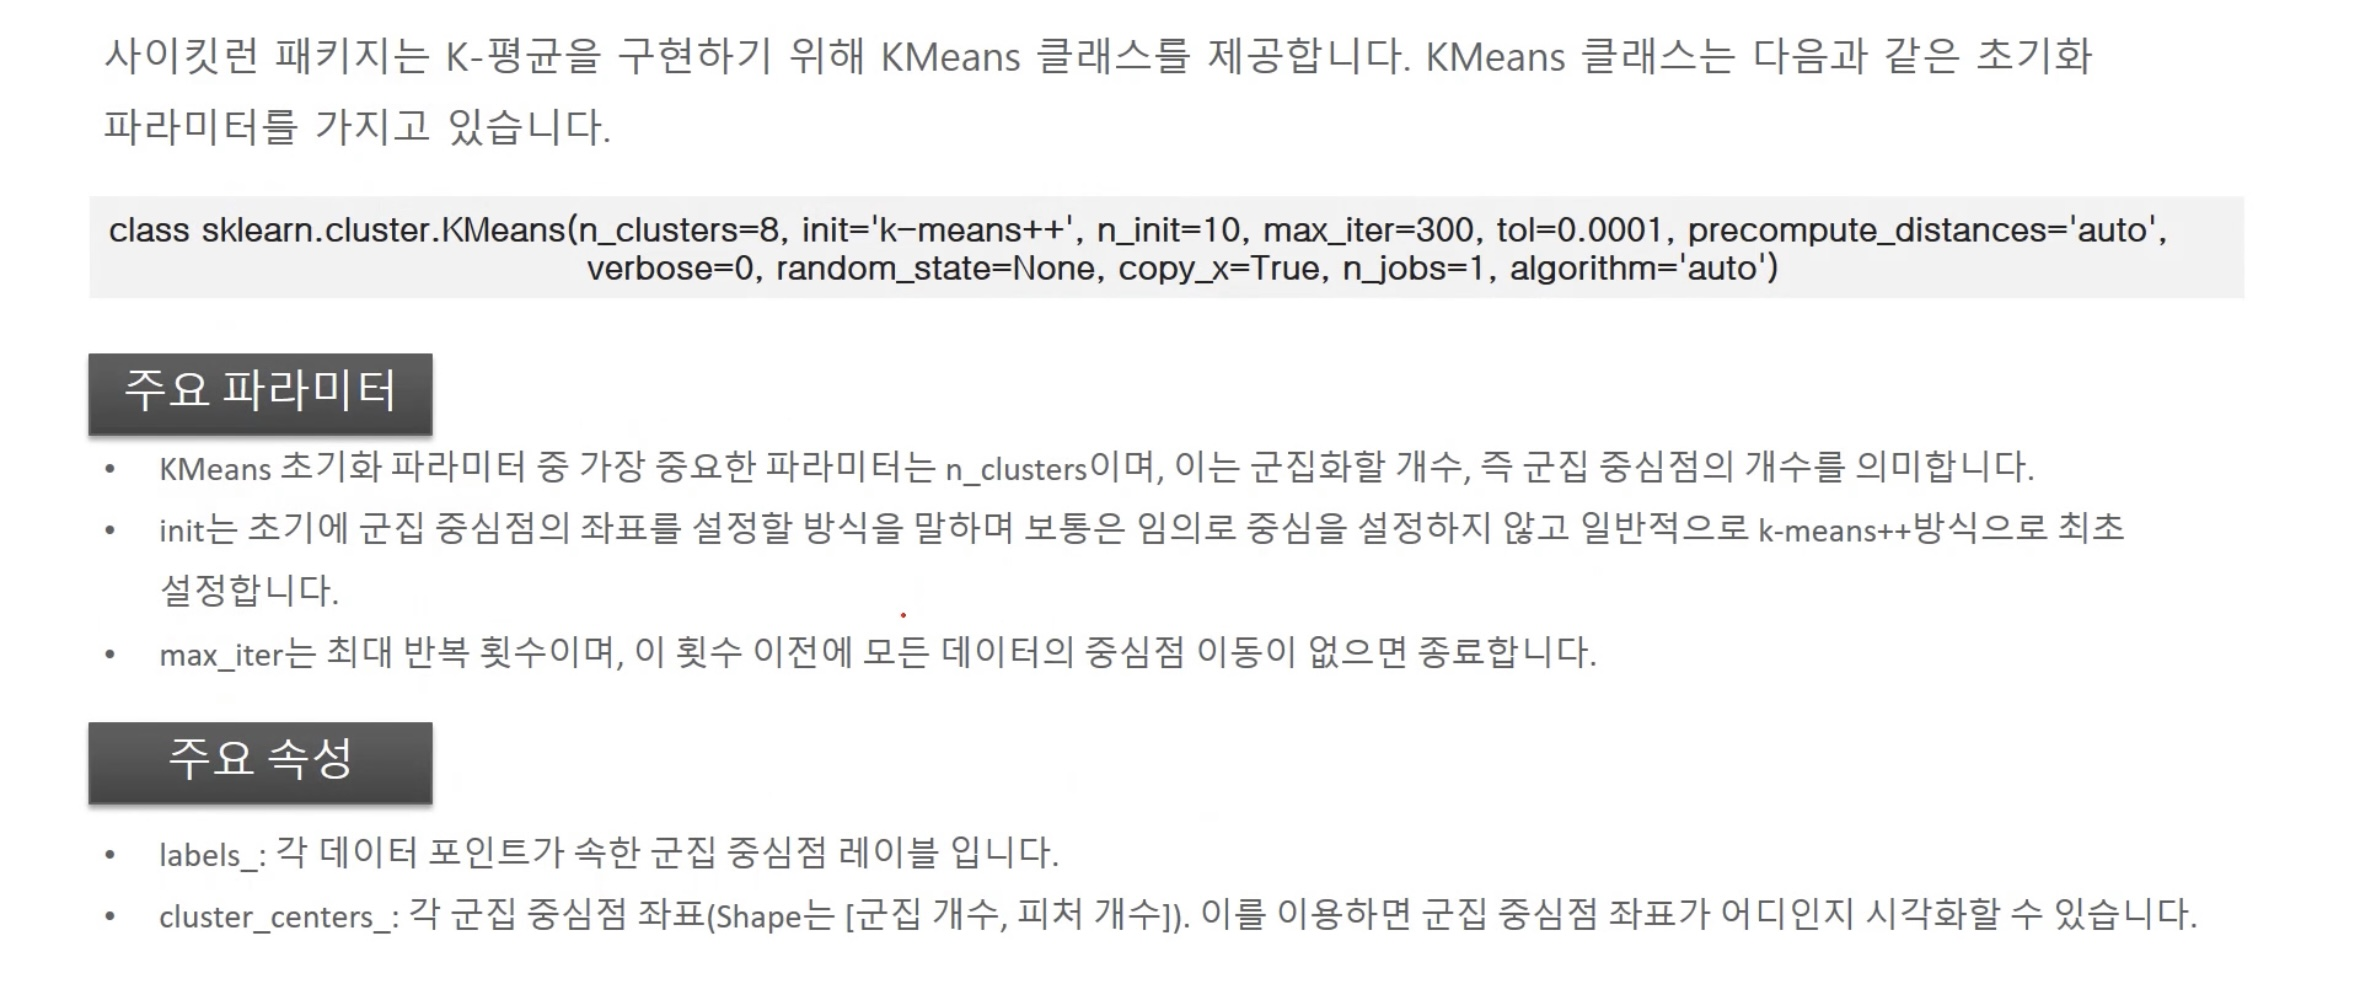

### K-Means를 이용한 붓꽃(Iris) 데이터 셋 Clustering

In [2]:
from sklearn.preprocessing import scale 
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
%matplotlib inline 

iris = load_iris()
print('target name:', iris.target_names)
# 보다 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

target name: ['setosa' 'versicolor' 'virginica']


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


#### KMeans 객체를 생성하고 군집화 수행 

* labels_ 속성을 통해 각 데이터 포인트별로 할당된 군집 중심점(Centroid)확인
* fit_predicts(), fit_transform() 수행 결과 확인

In [3]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [4]:
print(kmeans.labels_) # cluster의 고유의 label / 타겟값과 다름

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [5]:
kmeans.fit_predict(irisDF)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [6]:
kmeans.fit_transform(irisDF) # 좌표값 반환

array([[3.41925061, 0.14135063, 5.0595416 ],
       [3.39857426, 0.44763825, 5.11494335],
       [3.56935666, 0.4171091 , 5.27935534],
       [3.42240962, 0.52533799, 5.15358977],
       [3.46726403, 0.18862662, 5.10433388],
       [3.14673162, 0.67703767, 4.68148797],
       [3.51650264, 0.4151867 , 5.21147652],
       [3.33654987, 0.06618157, 5.00252706],
       [3.57233779, 0.80745278, 5.32798107],
       [3.3583767 , 0.37627118, 5.06790865],
       [3.32449131, 0.4824728 , 4.89806763],
       [3.31126872, 0.25373214, 4.9966845 ],
       [3.46661272, 0.50077939, 5.19103612],
       [3.90578362, 0.91322505, 5.65173594],
       [3.646649  , 1.01409073, 5.10804455],
       [3.49427881, 1.20481534, 4.88564095],
       [3.495248  , 0.6542018 , 5.03090587],
       [3.38444981, 0.1441527 , 5.02342022],
       [3.11245944, 0.82436642, 4.61792995],
       [3.37738931, 0.38933276, 4.97213426],
       [3.07471224, 0.46344363, 4.6955761 ],
       [3.31506588, 0.3286031 , 4.9236821 ],
       [3.

### 군집화 결과를 irisDF에 'cluster' 컬럼으로 추가하고 target 값과 결과 비교 

In [7]:
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


### 2차원 평면에 데이터 포인트별로 군집화된 결과를 나타내기 위해 2차원 PCA값으로 각 데이터 차원축소

In [8]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


In [10]:
maker0_ind = irisDF[irisDF['cluster']==0].index
maker1_ind = irisDF[irisDF['cluster']==1].index
maker2_ind = irisDF[irisDF['cluster']==2].index

maker0_ind.shape

(62,)

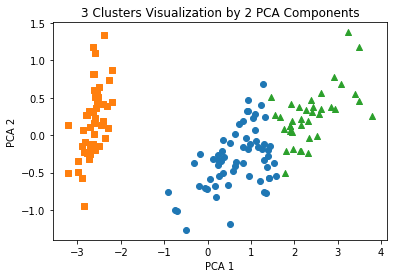

In [11]:
# cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 marker 표시
plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'], y=irisDF.loc[marker0_ind,'pca_y'], marker='o') 
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'], y=irisDF.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'], y=irisDF.loc[marker2_ind,'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

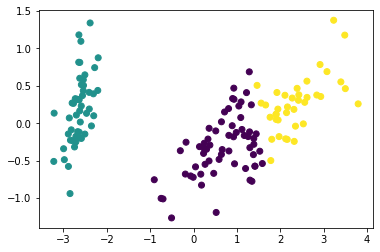

In [12]:
plt.scatter(x=irisDF.loc[:, 'pca_x'], y=irisDF.loc[:, 'pca_y'], c=irisDF['cluster']) 

### Clustering 알고리즘 테스트를 위한 데이터 생성

In [14]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline 

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인 
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


* n_samples : 생성할 총 데이터의 개수 (default=100) 
* n_features : 데이터의 피처 개수 / 시각화를 목표로 할 경우 2개로 설정해 보통 첫 번째 피처는 x좌표, 두 번째 피처는 y좌표상에 표현 
* centers : int값, 예를 들어 3으로 설정하면 군집의 개수를 나타낸다. 그렇지 않고 ndarray 형태로 표현할 경우 개별 군집 중심점의 좌표를 의미 
* cluster_std : 생성될 군집 데이터의 표준 편차를 의미, 만일 float값 0.8과 같은 형태로 지정하면 군집 내에서 데이터가 표준편차 0.8을 가진 값으로 만들어진다.  
[0.8, 1,2, 0.6]과 같은 형태로 표현되면 3개의 군집에서 첫 번째 군집 내
데이터의 표준편차는 0.8, 두 번째 군집 내 데이터의 표준 편차는 1.2, 세 번째 군집 내 데이터의 표준편차는 0.6으로 만듭
니다.   
군집별로 서로 다른 표준 편차를 가진 데이터 세트를 만들 때 사용합니다  

In [15]:
import pandas as pd 

clusterDF = pd.DataFrame(data=X, columns=['ftr1','ftr2'])
clusterDF['target'] = y
clusterDF.head(10)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0
5,-0.908302,1.970778,2
6,2.472119,0.437033,1
7,1.656842,2.441289,1
8,1.077800,4.625379,0
9,-1.679427,2.602003,2


#### make_blobs()으로 만들어진 데이터 포인트들을 시각화

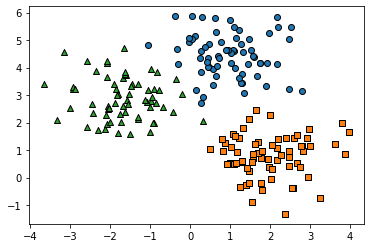

In [16]:
target_list = np.unique(y)

# 각 target별 scatter plot의 marker값들 
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

# 3개의 cluster영역으로 구분한 데이터 셋을 생성했으므로 target_list는 [0,1,2]
# target==0, target==1, target==2 scatter plot을 marker별로 생성
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target])
plt.show()

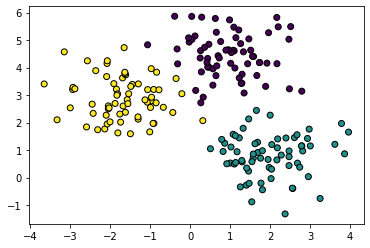

In [19]:
target_list = np.unique(y)
plt.scatter(x=clusterDF['ftr1'], y=clusterDF['ftr2'], edgecolor='k', c=y )

#### K-Means 클러스터링을 수행하고 개별 클러스터의 중심 위치를 시각화 

In [22]:
kmeans.cluster_centers_

array([[ 0.990103  ,  4.44666506],
       [-1.70636483,  2.92759224],
       [ 1.95763312,  0.81041752]])

In [20]:
clusterDF

,ftr1,ftr2,target,kmeans_label
0,-1.692427,3.622025,2,1
1,0.697940,4.428867,0,0
2,1.100228,4.606317,0,0
3,-1.448724,3.384245,2,1
4,1.214861,5.364896,0,0
...,...,...,...,...
195,2.956576,0.033718,1,2
196,-2.074113,4.245523,2,1
197,2.783411,1.151438,1,2
198,1.226724,3.620511,0,0


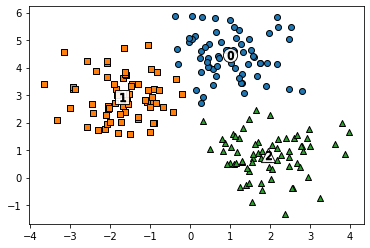

In [18]:
# KMeans 객체를 이용하여 X 데이터를 K-Means 클러스터링 수행 
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels 

# cluster_centers_는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출 
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행. 
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )
    
    # 군집별 중심 위치 좌표 시각화 
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)

plt.show()

In [23]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


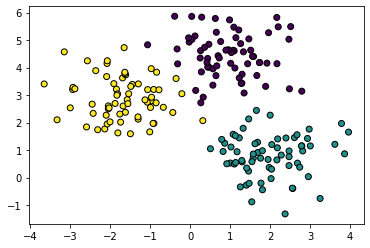

In [24]:
# 원본 데이터 시각화 
target_list = np.unique(y)
plt.scatter(x=clusterDF['ftr1'], y=clusterDF['ftr2'], edgecolor='k', c=y )